In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


In [93]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df = pd.read_csv("/home/eyal/dev/eyal-thesis/thesis-datasets-creator/ucdavis_quic/index.csv")
df.head()

,flow_dir,source_dataset,application,category,application_and_category,device_type,origin_txt_file_name,duration_sec,bytes_out,bytes_in,num_pkts_out,num_pkts_in
0,/home/eyal/Documents/master/thesis/networking/...,ucdavis_quic,google,search,g_search,nan,GoogleSearch-3,25.50,27975,261016,139,309
1,/home/eyal/Documents/master/thesis/networking/...,ucdavis_quic,google,search,g_search,nan,GoogleSearch-12,29.30,42405,702918,245,634
2,/home/eyal/Documents/master/thesis/networking/...,ucdavis_quic,google,search,g_search,nan,GoogleSearch-11,28.34,34359,1013102,208,876
3,/home/eyal/Documents/master/thesis/networking/...,ucdavis_quic,google,search,g_search,nan,GoogleSearch-1,26.38,22396,227918,125,280
4,/home/eyal/Documents/master/thesis/networking/...,ucdavis_quic,google,search,g_search,nan,GoogleSearch-14,27.66,36076,229600,157,326


In [94]:
df.application_and_category.value_counts()

g_search    1960
g_drive     1682
g_doc       1266
youtube     1127
g_music      637
Name: application_and_category, dtype: int64

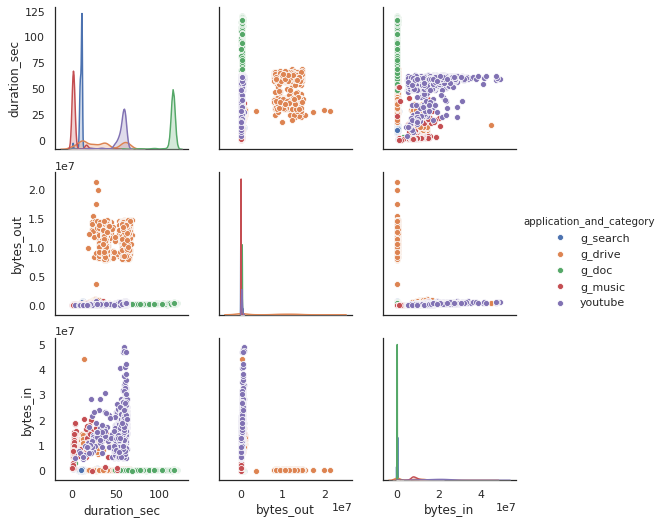

In [97]:
features_list = ["duration_sec", "bytes_out", "bytes_in"]
sns.pairplot(df[features_list + ["application_and_category"]], hue="application_and_category")


In [123]:
# Train some model on 10 samples

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from xgboost import XGBClassifier


features_list = ["duration_sec", "bytes_out", "bytes_in"]
X =  df[features_list].values
Y = df.application_and_category.map({"g_search":0, "g_drive":1, "g_doc":2, "g_music":3, "youtube":4})

# split data into train and test sets
seed = 12
test_size = 0.9984

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=seed)
print(f"train: {X_train.shape}, {list(y_train)}")
print(f"test: {X_test.shape}")
# fit model no training data
# model = XGBClassifier()
model = XGBClassifier(eval_metric='mlogloss') #merror
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="micro")
print(f"Accuracy: {accuracy * 100:.2f}")
print(f"f1: {f1}")


train: (10, 3), [1, 3, 4, 2, 4, 0, 1, 0, 2, 0]
test: (6662, 3)
Accuracy: 82.96
f1: 0.8296307415190634


/home/eyal/anaconda3/envs/tutorials/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [146]:
df2 = pd.read_csv("/home/eyal/dev/eyal-thesis/thesis-datasets-creator/iscx_vpn/index.csv")
df2.groupby("category").head(2)

,flow_dir,source_dataset,application,category,application_and_category,device_type,tor,vpn,origin_pcap_name,duration_sec,bytes_out,bytes_in,num_pkts_out,num_pkts_in
0,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,aim,chat,aim_chat,nan,False,False,aim_chat_3a,0.41,100,0,2,0
1,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,aim,chat,aim_chat,nan,False,False,aim_chat_3a,624.63,24934,12738,151,148
40,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,facebook,voip,facebook_audio,nan,False,False,facebook_audio1b,0.41,100,0,2,0
41,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,facebook,voip,facebook_audio,nan,False,False,facebook_audio1b,0.41,100,0,2,0
92,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,scp,file_transfer,scp_up,nan,False,False,scpUp5,0.00,63,113,1,1
93,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,scp,file_transfer,scp_up,nan,False,False,scpUp5,0.00,63,113,1,1
107,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,spotify,music,spotify,nan,False,False,spotify4,0.18,2055,1919,15,14
108,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,spotify,music,spotify,nan,False,False,spotify4,1.00,152,120,3,3
1235,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,twitter,NaN,tor_twitter,nan,True,False,torTwitter,270.38,364,364,7,7
1236,/home/eyal/Documents/master/thesis/networking/...,ISCX_VPN_NonVPN_2016,twitter,NaN,tor_twitter,nan,True,False,torTwitter,0.00,40,0,1,0


In [174]:
df2.category.value_counts()

voip             123459
file_transfer     40876
chat               7845
email              5245
streaming          4288
p2p                1045
music               230
Name: category, dtype: int64

Series([], Name: category, dtype: int64)

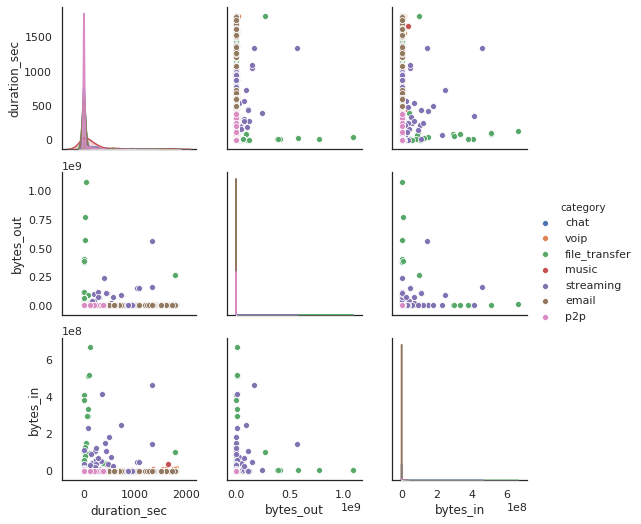

In [133]:
features_list = ["duration_sec", "bytes_out", "bytes_in"]
sns.pairplot(df2[features_list + ["category"]], hue="category")


In [187]:
# Train some model on 10 samples

from numpy import loadtxt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from xgboost import XGBClassifier


features_list = ["duration_sec", "bytes_out", "bytes_in"]
X =  df2[features_list].values
Y = df2.category.map({"voip":0, "file_transfer":1, "chat":2, "email":3, "streaming":4, "p2p":5, "music":6})
Y = np.nan_to_num(Y, nan=7) #TODO FIX HACKKKKKKKKKKKKKKKKKKK
print(np.unique(Y))

# split data into train and test sets
seed = 12
test_size = 0.9984
# test_size = 0.5

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=seed)
print(f"train: {X_train.shape}") #, {list(y_train)}
print(f"test: {X_test.shape}")



# fit model no training data
# model = XGBClassifier()
model = XGBClassifier(eval_metric='mlogloss') #merror
model.fit(X_train, y_train)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average="micro")
print(f"Accuracy: {accuracy * 100:.2f}")
print(f"f1: {f1}")


[0. 1. 2. 3. 4. 5. 6. 7.]
train: (292, 3)
test: (182712, 3)


/home/eyal/anaconda3/envs/tutorials/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy: 58.44
f1: 0.584395113621437
